## Projeto Ciência de Dados 2 - Previsão de média escolar pelas horas de video game

- Nosso desafio é conseguir prever a 

### Integrantes: 

- Eduardo 
- Eric
- Felipe 
- Lourenco 

### Técnicas Aplicadas 

- Regressão Linear
- Random Forest 

### Link para o dataset completo

- https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

## Introdução ao tema ...

" • Detalhar objetivo escolhido para trabalhar neste projeto juntamente com descrição da base de
dados. Pesquise trabalhos na literatura que discutam o tema escolhido. Para trabalhos
acadêmicos, acesse https://scholar.google.com.br/. Guarde as referências estudadas para citálas no seu projeto."

### Descrição das colunas importantes para a previsão

- **Life Ladder**:Imagine uma escada, com degraus numerados de 0 na parte inferior a 10 na parte superior. O topo da escada representa a melhor vida possível para você e a base da escada representa a pior vida possível para você.

- **Log GDP per capita**: Em sua interpretação mais básica, o PIB per capita mostra quanto valor de produção econômica pode ser atribuído a cada cidadão individual. Alternativamente, isso se traduz em uma medida de riqueza nacional, uma vez que o valor de mercado do PIB por pessoa também serve prontamente como uma medida de prosperidade.

- **Social support**: o apoio social é definido em termos de características da rede social, como assistência da família, amigos, vizinhos e outros membros da comunidade.

- **Healthy life expectancy**: a expectativa de vida saudável é a média de vida com boa saúde - ou seja, sem limitação irreversível da atividade na vida diária ou incapacidades - de uma geração fictícia sujeita às condições de mortalidade e morbidade prevalecentes naquele ano

- **Freedom to make life choices**: a liberdade de escolha descreve a oportunidade e a autonomia de um indivíduo para realizar uma ação selecionada a partir de pelo menos duas opções disponíveis, sem restrições de partes externas

- **Generosity**: generosidade é a virtude de ser liberal ao dar, geralmente como presentes.

- **Perceptions of corruption**: A corrupção é uma forma de desonestidade ou crime cometido por uma pessoa ou organização a quem foi confiada uma posição de autoridade, para obter benefício ilícito





### Colunas que faltam informação ou não são relevantes para prever a 

- Standard error of **ladder score** : Error Occure while reading Ladder Score of each Country.


- **Upperwhisker** : I don't know this for sure, but maybe it is realted to box-whisker plot.


- **Lowerwhisker**: I don't know this for sure, but maybe it is realted to box-whisker plot.


- **Ladder score in Dystopia**: Ladder Score in Hypothetical Country that has values equal to the world’s lowest national averages.


- Explained by: **Log GDP per capita**: It is mean of Log GDP per capita which is calculated from past dataset of country.


- Explained by: **Social support**: It is mean of Social support value which is calculated from past dataset of country.


- Explained by: **Healthy life expectancy**:  é a média de expectativa de vida saudável, calculada a partir de um conjunto de dados anteriores do país.


- Explained by: **Freedom to make life choices** :É a liberdade de fazer escolhas de vida calculada a partir de um conjunto de dados anteriores do país.


- Explained by: **Generosity**:é a média da generosidade calculada a partir do conjunto de dados anterior do país.



- Explained by: **Perceptions of corruption**: It is mean of Perceptions of corruption which is calculated from past dataset of country.


- **Dystopia + residual**: A Hypothetical Country that has values equal to the world’s lowest national averages.


## Começando o projeto 

In [1]:
import pandas as pd
df = pd.read_csv("world-happiness-report-2021.csv")
display(df)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


## Ajustes de Dados (Tratamento/Limpeza)

O que estamos buscando aqui de forma geral
são:
- Dados faltantes;
- Dados com valor 0(ZERO) quando deveriam ser valores coerentes;
- Outliers que não representam bem o histórico e logo não ajudam a criação do modelo;
- Erros na base;
- Erros de importação;

### Variaveis de interesse...

 Descreva as variáveis finais que serão utilizadas a partir deste ponto.
 Faça análise descritiva detalhada das variáveis, norteado pelo objetivo do problema. 

In [2]:
df.info()
# variavies estao como numeros ( como deveriam) e não há coluna nula.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
Country name                                  149 non-null object
Regional indicator                            149 non-null object
Ladder score                                  149 non-null float64
Standard error of ladder score                149 non-null float64
upperwhisker                                  149 non-null float64
lowerwhisker                                  149 non-null float64
Logged GDP per capita                         149 non-null float64
Social support                                149 non-null float64
Healthy life expectancy                       149 non-null float64
Freedom to make life choices                  149 non-null float64
Generosity                                    149 non-null float64
Perceptions of corruption                     149 non-null float64
Ladder score in Dystopia                      149 non-null float64
Explained by: Log GDP per 

In [3]:
#remover as colunas apresentam valores nulos 
df = df.dropna(how='any',axis=1)

# colunas que serão impiortantes para análise
df = df[["Country name", "Healthy life expectancy", "Ladder score", "Social support","Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

df.info() # dados estão numéricos e não nulos como deveriam ser
# display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
Country name                    149 non-null object
Healthy life expectancy         149 non-null float64
Ladder score                    149 non-null float64
Social support                  149 non-null float64
Freedom to make life choices    149 non-null float64
Generosity                      149 non-null float64
Perceptions of corruption       149 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [5]:
display(df)

,Country name,Healthy life expectancy,Ladder score,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,72.000,7.842,0.954,0.949,-0.098,0.186
1,Denmark,72.700,7.620,0.954,0.946,0.030,0.179
2,Switzerland,74.400,7.571,0.942,0.919,0.025,0.292
3,Iceland,73.000,7.554,0.983,0.955,0.160,0.673
4,Netherlands,72.400,7.464,0.942,0.913,0.175,0.338
...,...,...,...,...,...,...,...
144,Lesotho,48.700,3.512,0.787,0.715,-0.131,0.915
145,Botswana,59.269,3.467,0.784,0.824,-0.246,0.801
146,Rwanda,61.400,3.415,0.552,0.897,0.061,0.167
147,Zimbabwe,56.201,3.145,0.750,0.677,-0.047,0.821


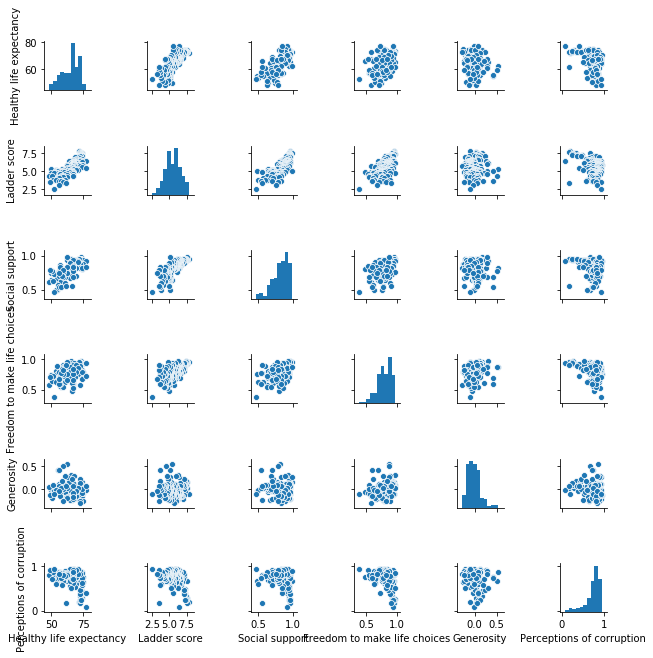

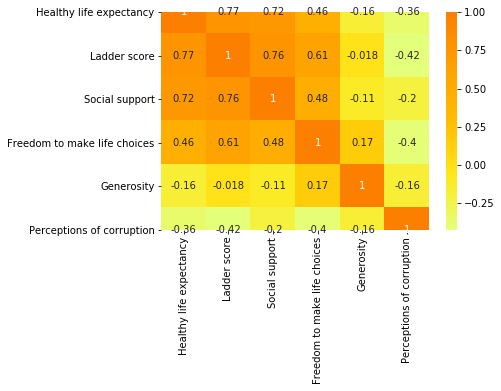

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, height=1.5);
plt.show()

sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

Aqui, é interessante entender como media se comporta cruzada com cada feature.



Lembrando que:

**Correlação ( -1 <=> 1 )**
- Correlação forte -> próxima de 1.
- Correlaçao media -> 0.4 < corr < 0.7
- Correlação fraca -> próxima de 0.
- Correlação inversa -> -1.



**Objetivo:** prever a 

Target = 



Logo, olhar correlacoes de horas da média de notas com cada feature



#### Observações



- 


**...**